In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

DATA_PATH = "../data/bmd.csv"

In [2]:
df = pd.read_csv(DATA_PATH)
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


In [4]:
df.describe(include="all")

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
count,169.000000,169.000000,169,169,169.000000,169.000000,169,169.000000,169.000000
unique,NaN,NaN,2,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,M,no fracture,NaN,NaN,No medication,NaN,NaN
freq,NaN,NaN,86,119,NaN,NaN,136,NaN,NaN
mean,9102.556213,63.631531,NaN,NaN,64.665680,160.254438,NaN,19.739645,0.783104
std,8744.623598,12.356936,NaN,NaN,11.537171,7.928272,NaN,15.800570,0.166529
min,35.000000,35.814058,NaN,NaN,36.000000,142.000000,NaN,5.000000,0.407600
25%,2018.000000,54.424211,NaN,NaN,56.000000,154.000000,NaN,9.000000,0.670800
50%,6702.000000,63.487837,NaN,NaN,64.500000,160.500000,NaN,14.000000,0.786100
75%,17100.000000,72.080558,NaN,NaN,73.000000,166.000000,NaN,24.000000,0.888800


In [5]:
df.isna().sum()

id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

In [6]:
cat_cols = ["sex", "fracture", "medication"]

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


--- sex ---
sex
M    86
F    83
Name: count, dtype: int64

--- fracture ---
fracture
no fracture    119
fracture        50
Name: count, dtype: int64

--- medication ---
medication
No medication      136
Glucocorticoids     24
Anticonvulsant       9
Name: count, dtype: int64


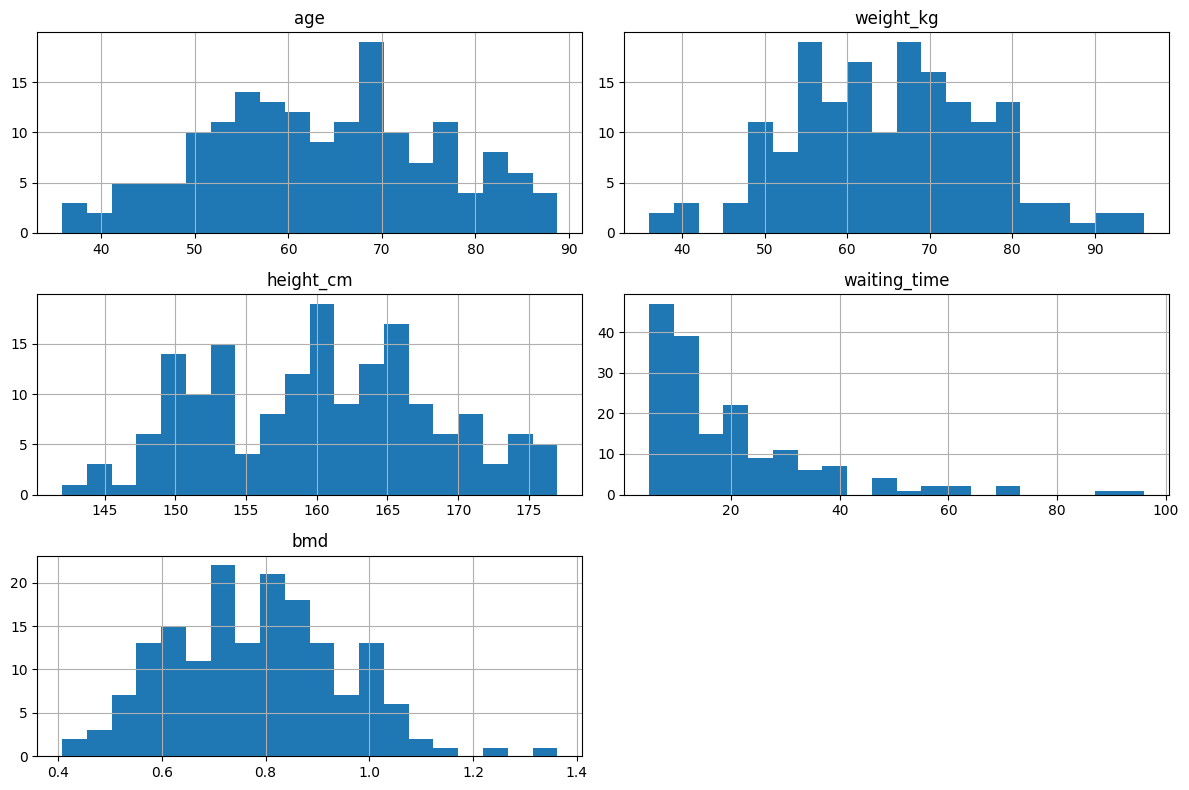

In [7]:
num_cols = ["age", "weight_kg", "height_cm", "waiting_time", "bmd"]

df[num_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

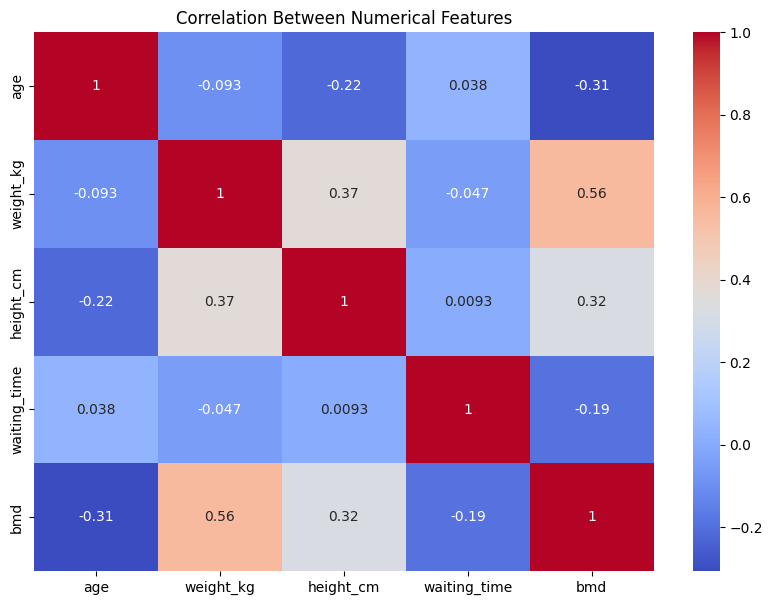

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Features")
plt.show()

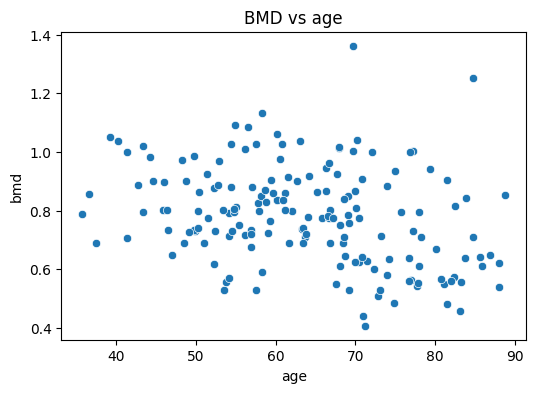

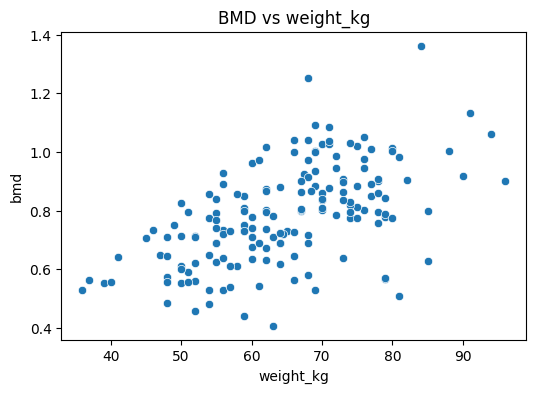

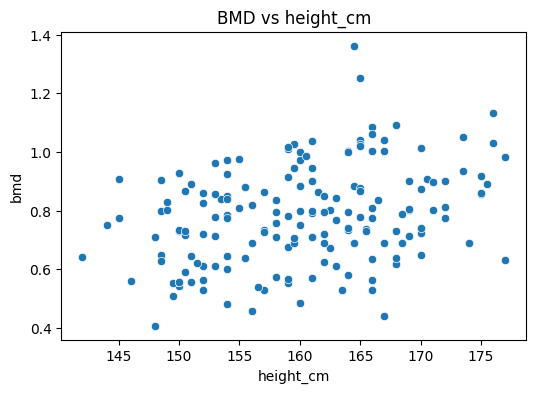

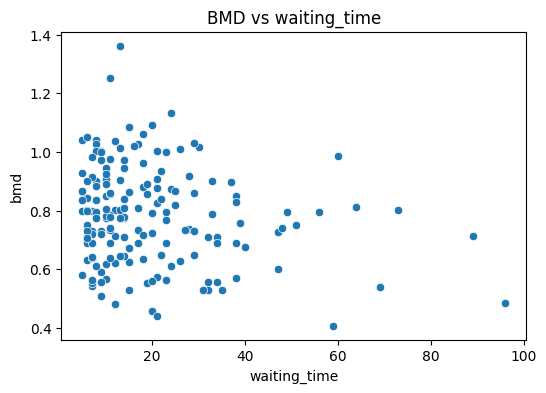

In [10]:
for col in num_cols:
    if col != "bmd":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df["bmd"])
        plt.title(f"BMD vs {col}")
        plt.show()

In [12]:
df["BMI"] = df["weight_kg"] / (df["height_cm"] / 100) ** 2
df["BMI"].describe()

count    169.000000
mean      25.203732
std        4.411745
min       15.426605
25%       22.145329
50%       24.964946
75%       27.548209
max       38.544820
Name: BMI, dtype: float64

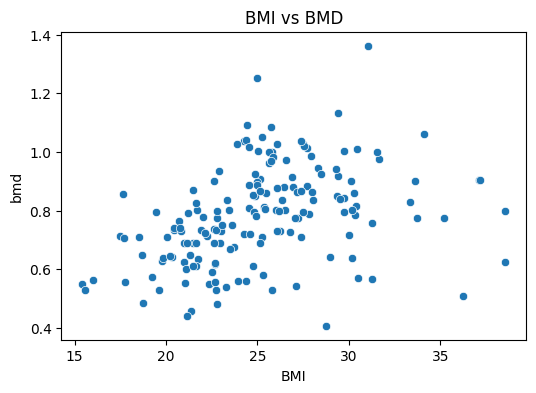

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["BMI"], y=df["bmd"])
plt.title("BMI vs BMD")
plt.show()